Customer Churn Prediction

In [ ]:
# Importing all the Lbraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib
%matplotlib inline
pd.set_option('display.max_columns', 100)
from statistics import mode
from sklearn.preprocessing import * # StandardScaler, Label Encoder
from sklearn.model_selection import train_test_split as tts

In [ ]:
from sys import version
print("Python Version :",version[:8])

Python Version : 3.11.11 


In [ ]:
import warnings
warnings.filterwarnings('ignore')

Importing the data

In [ ]:
df = pd.read_excel('/content/LoyaltyVision Analytics.xlsx')

In [ ]:
# Shape and Size
df.shape, df.size

((11260, 19), 213940)

In [ ]:
# Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [ ]:
# Checking all the missing values
missing_values = df.isna().sum()
print(missing:=missing_values[missing_values > 0])

Tenure                  102
City_Tier               112
CC_Contacted_LY         102
Payment                 109
Gender                  108
Service_Score            98
Account_user_count      112
account_segment          97
CC_Agent_Score          116
Marital_Status          212
rev_per_month           102
Complain_ly             357
Day_Since_CC_connect    357
cashback                471
Login_device            221
dtype: int64


Filling the missing values in data

In [ ]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[num_columns] = df[num_columns].apply(lambda col: col.fillna(col.median()))
# Filling na-values with median for Int

In [ ]:
cat_columns = df.select_dtypes(include=['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda col: col.fillna(col.mode()[0]))
# Filling na-values with median for Cat

In [ ]:
# Checking all the missing values
missing_values = df.isna().sum()
print(missing:=missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
# Checking stat understanding of data..
df.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,25629.50000,0.168384,1.647425,17.850178,2.903375,3.065808,0.276288
std,3250.62635,0.374223,0.912763,8.814851,0.722476,1.372663,0.447181
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [ ]:
# Checking the Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  object 
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  object 
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  object 
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

In [ ]:
# Checking the Data-Randomly (Sampling Technique)
df.sample(frac=0.1, random_state = 166).head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
2646,22646,0,30,3.0,8.0,Credit Card,Male,2.0,3,Super Plus,4.0,Married,5,0.0,22,4,14,262.91,Mobile
8696,28696,0,25,3.0,24.0,Debit Card,Female,3.0,4,Super,2.0,Divorced,10,0.0,14,1,8,174.36,Mobile
2353,22353,0,27,1.0,7.0,Credit Card,Female,2.0,3,Super Plus,1.0,Single,7,0.0,19,6,7,273.28,Mobile
5211,25211,0,18,3.0,8.0,E wallet,Female,4.0,4,Super,3.0,Married,9,0.0,13,1,1,172.68,Computer
2990,22990,0,15,3.0,9.0,Debit Card,Male,3.0,4,Super Plus,4.0,Single,3,0.0,20,2,5,285.15,Mobile


Taking a copy of the dataset

In [ ]:
new_df = df.copy()

In [ ]:
main_column = new_df.columns
data_show_case = {}

for each_col in main_column:
    data_show_case[each_col] = "Greater 10 values" if len(new_df[each_col].unique()) > 10 else new_df[each_col].unique()

df_show_case = pd.DataFrame(list(data_show_case.items()), columns=["Column Name", "Unique Values"])

# Here creating the dataframe as an ITEM
df_show_case

,Column Name,Unique Values
0,AccountID,Greater 10 values
1,Churn,"[1, 0]"
2,Tenure,Greater 10 values
3,City_Tier,"[3.0, 1.0, 2.0]"
4,CC_Contacted_LY,Greater 10 values
5,Payment,"[Debit Card, UPI, Credit Card, Cash on Deliver..."
6,Gender,"[Female, Male, F, M]"
7,Service_Score,"[3.0, 2.0, 1.0, 0.0, 4.0, 5.0]"
8,Account_user_count,"[3, 4, 5, 2, @, 1, 6]"
9,account_segment,"[Super, Regular Plus, Regular, HNI, Regular +,..."


Replacing all the unwanted values

In [ ]:
new_df['Gender'].replace({'F' : 'Female', 'M' : 'Male'}, inplace=True)
new_df['Account_user_count'].replace({'@' : '2'}, inplace=True)
new_df['account_segment'].replace({'Regular +' : 'Regular Plus', 'Super +' : 'Super Plus'}, inplace = True)
new_df['Login_device'].replace({'&&&&' : mode(new_df['Login_device'])}, inplace=True)
new_df['rev_per_month'].replace({'+' : np.nan}, inplace=True)
new_df['rev_per_month'] = new_df['rev_per_month'].fillna(mode(df['rev_per_month']))
new_df.replace({'#' : 3, '$' : 4, '*' : 8}, inplace=True)

In [ ]:
main_column = new_df.columns
data_show_case = {}

for each_col in main_column:
    data_show_case[each_col] = "Greater 10 values" if len(new_df[each_col].unique()) > 10 else new_df[each_col].unique()

df_show_case = pd.DataFrame(list(data_show_case.items()), columns=["Column Name", "Unique Values"])

# Here creating the dataframe as an ITEM
df_show_case

,Column Name,Unique Values
0,AccountID,Greater 10 values
1,Churn,"[1, 0]"
2,Tenure,Greater 10 values
3,City_Tier,"[3.0, 1.0, 2.0]"
4,CC_Contacted_LY,Greater 10 values
5,Payment,"[Debit Card, UPI, Credit Card, Cash on Deliver..."
6,Gender,"[Female, Male]"
7,Service_Score,"[3.0, 2.0, 1.0, 0.0, 4.0, 5.0]"
8,Account_user_count,"[3, 4, 5, 2, 2, 1, 6]"
9,account_segment,"[Super, Regular Plus, Regular, HNI, Super Plus]"


In [ ]:
df.to_csv('Cleaned_Data.csv', index = False) # Saving to a new data

Using data for visualizaiton

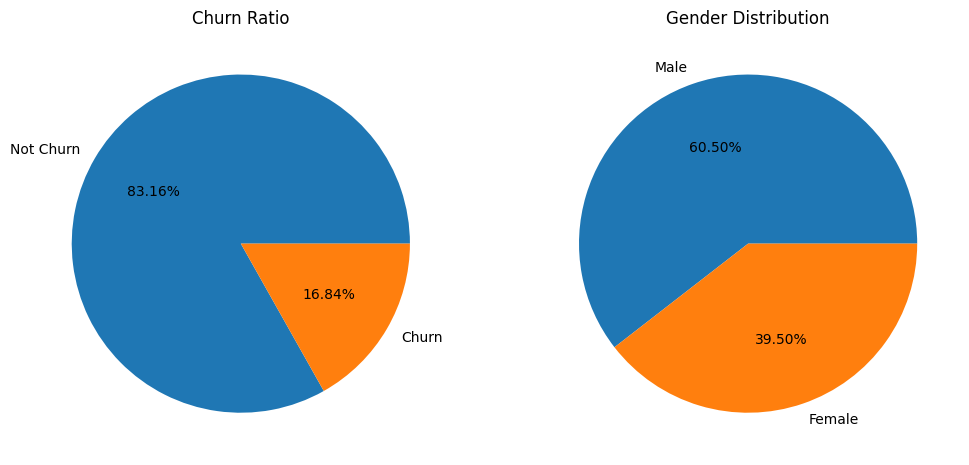

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Need 1 fig on each axis

# 1. Understanding the Churn
ax[0].set_title('Churn Ratio')
custom_label = ["Not Churn", "Churn"]
ax[0].pie(new_df['Churn'].value_counts().values, labels=custom_label, autopct="%.2f%%")

# 2. Understanding the Gender Distribution
ax[1].set_title('Gender Distribution')
ax[1].pie(new_df['Gender'].value_counts().values, labels=new_df['Gender'].value_counts().index, autopct="%.2f%%")

plt.show()  # Show plots once

From above Data we see imbalance in the Churn Ratio : Imbalanced

In [ ]:
new_df['Churn'].value_counts() # Need to look, when Building model

,count
Churn,
0,9364
1,1896


Observation :

Q : How many M and F Churned

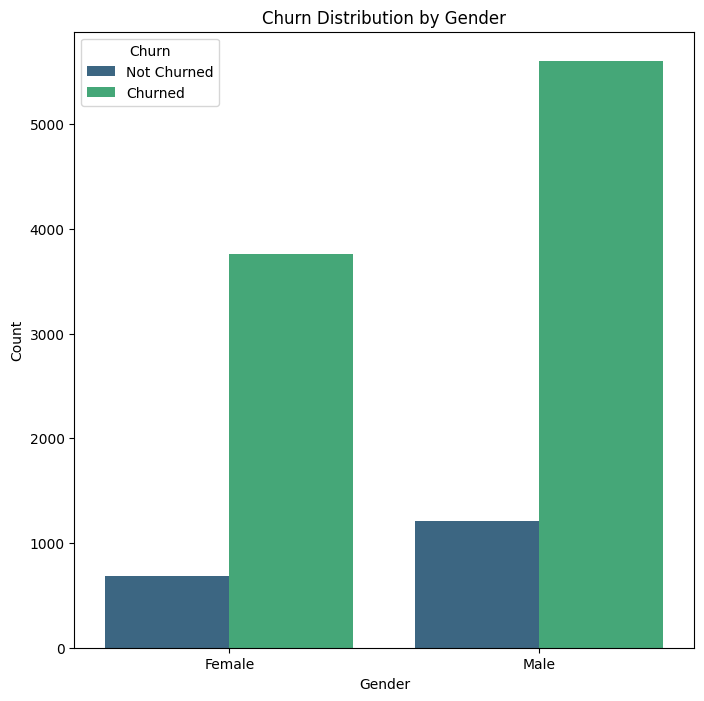

In [ ]:
plt.title("Churn Distribution by Gender")
sns.countplot(data=new_df, x='Gender', hue=new_df['Churn'].astype(str), palette='viridis')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])
plt.show()

Observation :

Q : How the Tenure is Distributed

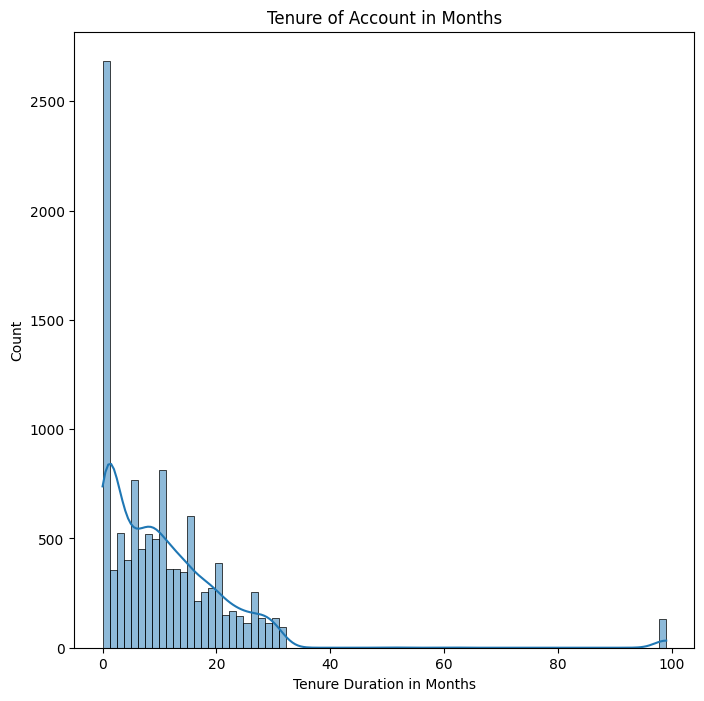

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8,8)
plt.title('Tenure of Account in Months')
sns.histplot(data = new_df, x = 'Tenure', kde=True, palette='pastel')
plt.xlabel('Tenure Duration in Months')
plt.show()

Observation:

Q : What is the Churn by Payment Method

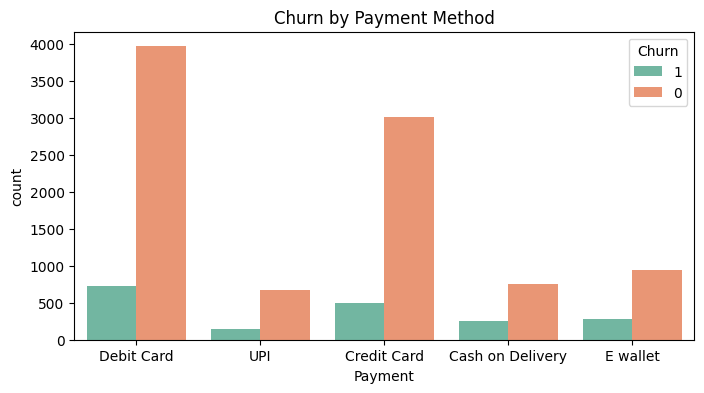

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=new_df, x='Payment', hue=new_df['Churn'].astype(str), palette='Set2')
plt.title("Churn by Payment Method")
plt.show()

Q : What is the Churn Based on the Tenure

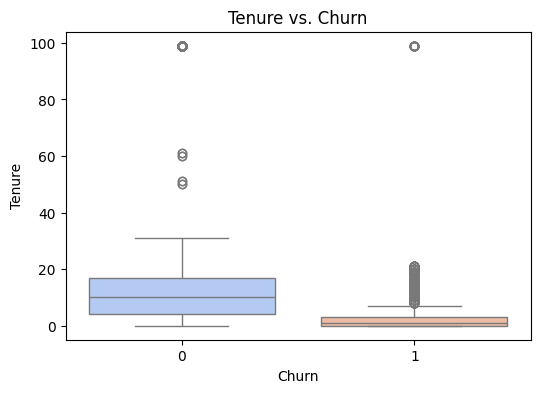

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=new_df, x='Churn', y='Tenure', palette='coolwarm')
plt.title("Tenure vs. Churn")
plt.show()

Observation :

Q :Service Score/Customer Care Score vs churn

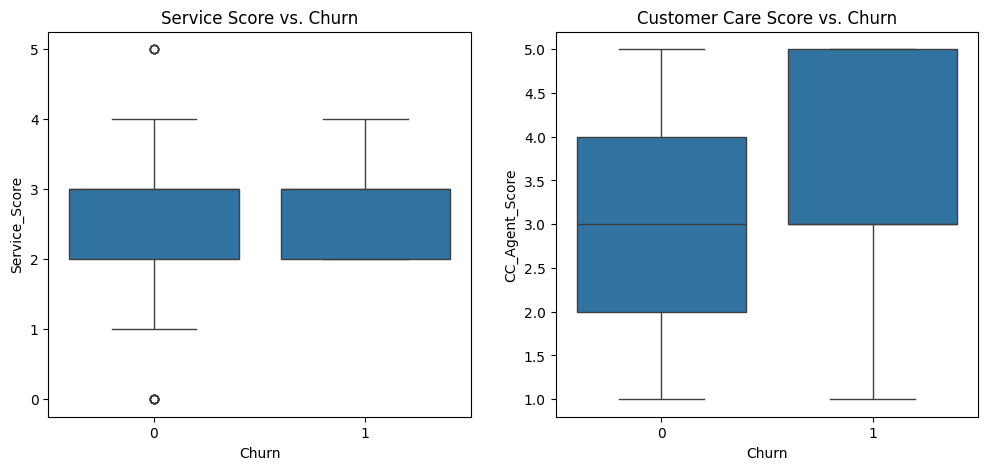

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(data=new_df, x='Churn', y='Service_Score', ax=ax[0])
ax[0].set_title("Service Score vs. Churn")

sns.boxplot(data=new_df, x='Churn', y='CC_Agent_Score', ax=ax[1])
ax[1].set_title("Customer Care Score vs. Churn")

plt.show()

Observation :

Q :Churn Rate by Tenure

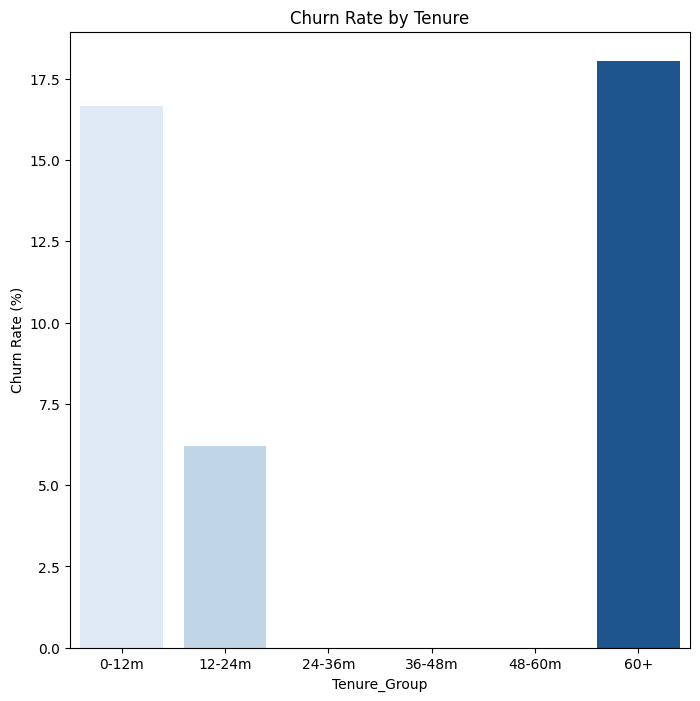

In [ ]:
new_df['Tenure_Group'] = pd.cut(new_df['Tenure'], bins=[0, 12, 24, 36, 48, 60, 100],
                                labels=['0-12m', '12-24m', '24-36m', '36-48m', '48-60m', '60+'])
tenure_churn = new_df.groupby('Tenure_Group')['Churn'].mean() * 100

sns.barplot(x=tenure_churn.index, y=tenure_churn.values, palette='Blues')
plt.title("Churn Rate by Tenure")
plt.ylabel("Churn Rate (%)")
plt.show()


Observation :

Q:Churn Rate by Payment Method

Payment
Cash on Delivery    25.049310
E wallet            22.678718
UPI                 17.396594
Debit Card          15.417376
Credit Card         14.212475
Name: Churn, dtype: float64


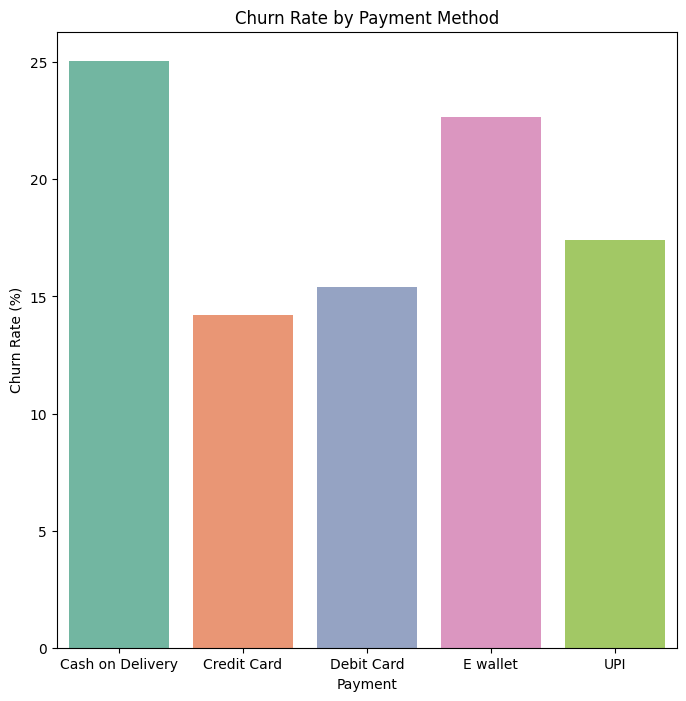

In [ ]:
payment_churn = new_df.groupby('Payment')['Churn'].mean() * 100
print(payment_churn.sort_values(ascending=False))

sns.barplot(x=payment_churn.index, y=payment_churn.values, palette='Set2')
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate (%)")
plt.show()

Observation :

Q :Service Score Distribution for Churned vs. Non-Churned Customers

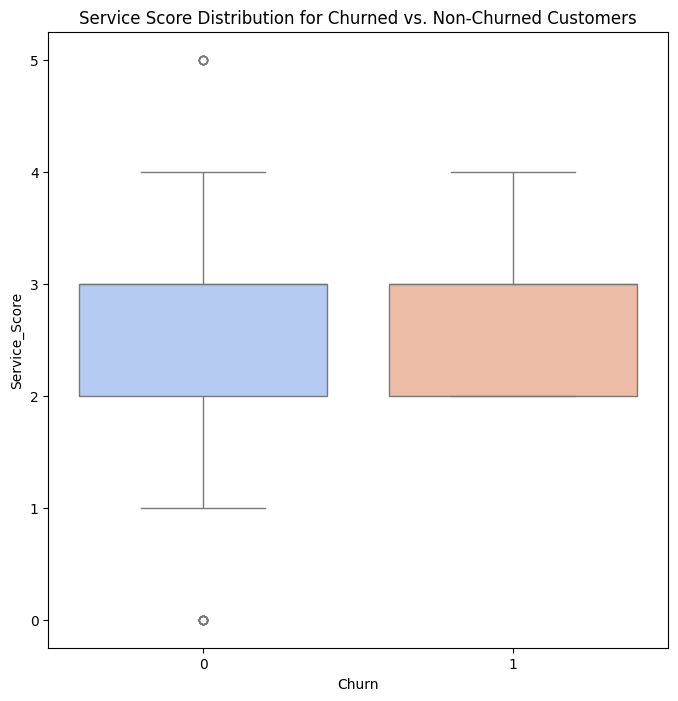

In [ ]:
sns.boxplot(data=new_df, x='Churn', y='Service_Score', palette='coolwarm')
plt.title("Service Score Distribution for Churned vs. Non-Churned Customers")
plt.show()


Q :Revenue Growth vs. Churn

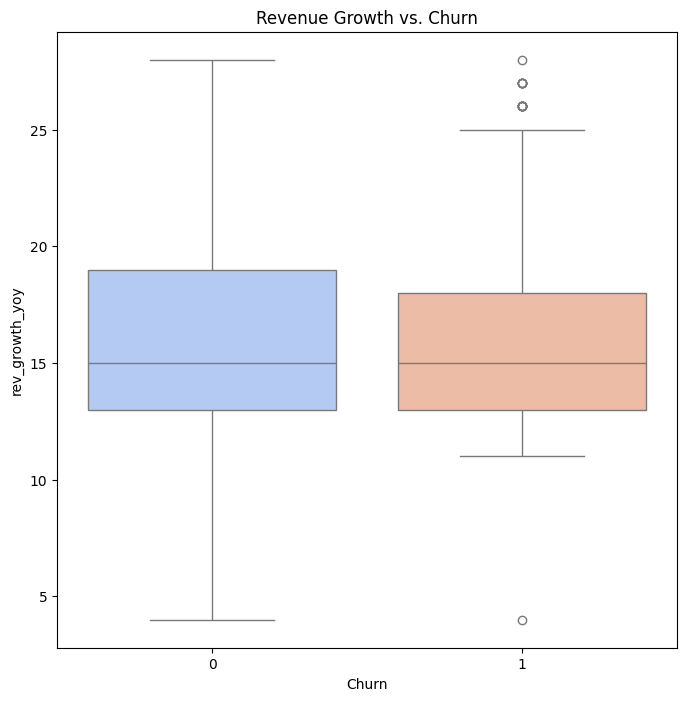

In [ ]:
sns.boxplot(data=new_df, x='Churn', y=new_df['rev_growth_yoy'].astype(float), palette='coolwarm')
plt.title("Revenue Growth vs. Churn")
plt.show()


Observation :

Building the model

In [ ]:
model_data = pd.read_csv('Cleaned_Data.csv')

In [ ]:
model_data.shape, model_data.size

((11260, 19), 213940)

In [ ]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  object 
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  object 
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  object 
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

In [ ]:
model_data.isna().sum()

,0
AccountID,0
Churn,0
Tenure,0
City_Tier,0
CC_Contacted_LY,0
Payment,0
Gender,0
Service_Score,0
Account_user_count,0
account_segment,0


All the column

In [ ]:
num_features = ['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
                'CC_Agent_Score', 'Complain_ly', 'rev_per_month', 'rev_growth_yoy']

In [ ]:
# Ensure numeric columns are converted correctly
for col in num_features:
    model_data[col] = pd.to_numeric(new_df[col], errors='coerce')  # Convert strings to NaN if necessary

Using the IQR for Removing the Outlier

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply outlier removal
clean_df = remove_outliers_iqr(model_data, num_features)

# Check dataset shape before and after
print("Original dataset shape:", new_df.shape)
print("After outlier removal:", clean_df.shape)

Original dataset shape: (11260, 20)
After outlier removal: (10884, 19)


Checking the Target Dataset, Rectifyig the imbalance dataset

In [ ]:
clean_df['Churn'].value_counts().reset_index()

,Churn,count
0,0,9064
1,1,1820


In [ ]:
# Convert necessary columns to numeric (in case they are objects)
clean_df['rev_per_month'] = pd.to_numeric(clean_df['rev_per_month'], errors='coerce')
clean_df['rev_growth_yoy'] = pd.to_numeric(clean_df['rev_growth_yoy'], errors='coerce')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# List of categorical columns
categorical_cols = ['Payment', 'Gender', 'Account_user_count', 'account_segment', 'Marital_Status', 'Login_device']

# Convert categorical columns to strings & encode them using LabelEncoder
for col in categorical_cols:
    clean_df[col] = clean_df[col].astype(str)  # Ensure string format
    le = LabelEncoder()
    clean_df[col] = le.fit_transform(clean_df[col])  # Encode as numeric

# Separate features and target variable
X = clean_df.drop(columns=['Churn'])  # Assuming 'Churn' is the target
y = clean_df['Churn']

# Convert all features to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)  # Replace NaNs

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print dataset shapes
print("Original Training set shape:", X_train.shape, y_train.shape)
print("Resampled Training set shape:", X_train_resampled.shape, y_train_resampled.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Original Training set shape: (8707, 18) (8707,)
Resampled Training set shape: (14502, 18) (14502,)
Testing set shape: (2177, 18) (2177,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7648
              precision    recall  f1-score   support

           0       0.95      0.76      0.84      1813
           1       0.40      0.80      0.53       364

    accuracy                           0.76      2177
   macro avg       0.67      0.78      0.69      2177
weighted avg       0.86      0.76      0.79      2177

Random Forest Accuracy: 0.9720
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1813
           1       0.95      0.88      0.91       364

    accuracy                           0.97      2177
   macro avg       0.96      0.93      0.95      2177
weighted avg       0.97      0.97      0.97      2177

Gradient Boosting Accuracy: 0.9192
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1813
           1       0.80      0.69      0.74       364

    accuracy                           0.92      2177
   macro avg       0.87  

Random Forest

Accuracy: 96.88%

F1-score (Class 1 - Churners): 0.90

Pros: High recall and precision, meaning it effectively detects churners without many false positives.

XGBoost

Accuracy: 96.69%

F1-score (Class 1 - Churners): 0.90

Pros: Similar to Random Forest, but slightly lower recall for churners (0.88 vs. 0.86 in RF).

Gradient Boosting

Accuracy: 91.92%

F1-score (Class 1 - Churners): 0.74

Pros: Good performance but weaker recall for churners (0.69).

Underperforming Models:

SVM (Accuracy: 52.14%) - Fails to detect churners well.

KNN (Accuracy: 63.48%) - Struggles with recall (0.52) for churners.

Logistic Regression (Accuracy: 76.48%) - Decent but lower recall for churners.


Best Choice: Random Forest or XGBoost (both are highly accurate with strong recall for churners).
Worst Choice: SVM (low accuracy and recall).

Building a Simple Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Neural Network Model
nn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5016 - loss: 33.6374 - val_accuracy: 0.8328 - val_loss: 3.9872
Epoch 2/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5374 - loss: 13.7775 - val_accuracy: 0.1888 - val_loss: 16.2599
Epoch 3/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5843 - loss: 6.7125 - val_accuracy: 0.8328 - val_loss: 3.4368
Epoch 4/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5851 - loss: 6.8954 - val_accuracy: 0.5351 - val_loss: 4.3878
Epoch 5/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6355 - loss: 5.2185 - val_accuracy: 0.8558 - val_loss: 1.1845
Epoch 6/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6519 - loss: 4.2696 - val_accuracy: 0.2931 - val_loss: 15.7280
Epoch 7/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6313 - loss: 5.7025 - val_accuracy: 0.8337 - val_loss: 1.0394
Epoch 8/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6550 - loss: 5.3966 - val_accuracy

In [ ]:
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy:.4f}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 1.2309
Neural Network Accuracy: 0.7910


Feature Importance

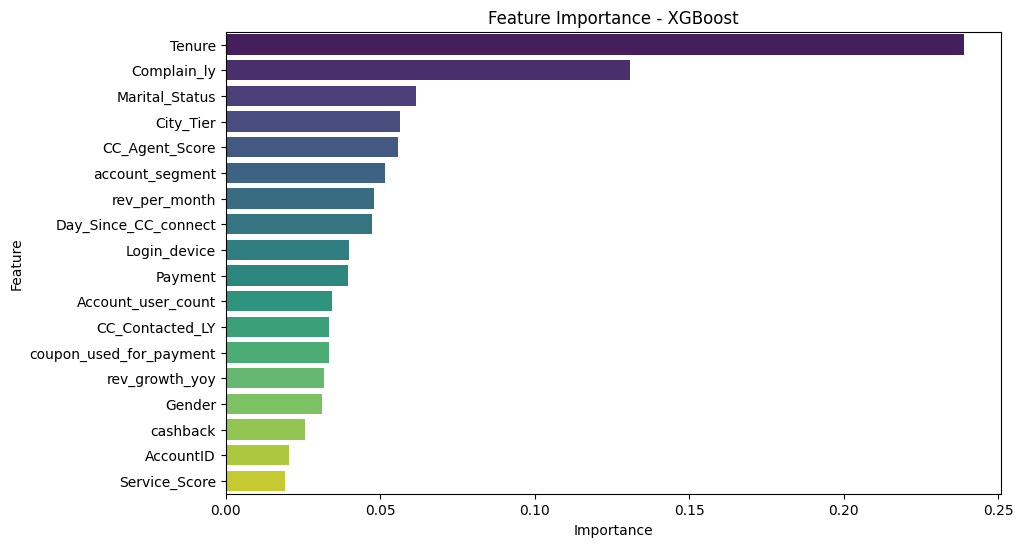

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Extract feature importance
xgb_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_model.feature_importances_})
xgb_importance = xgb_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importance.Importance, y=xgb_importance.Feature, palette='viridis')
plt.title("Feature Importance - XGBoost")
plt.show()

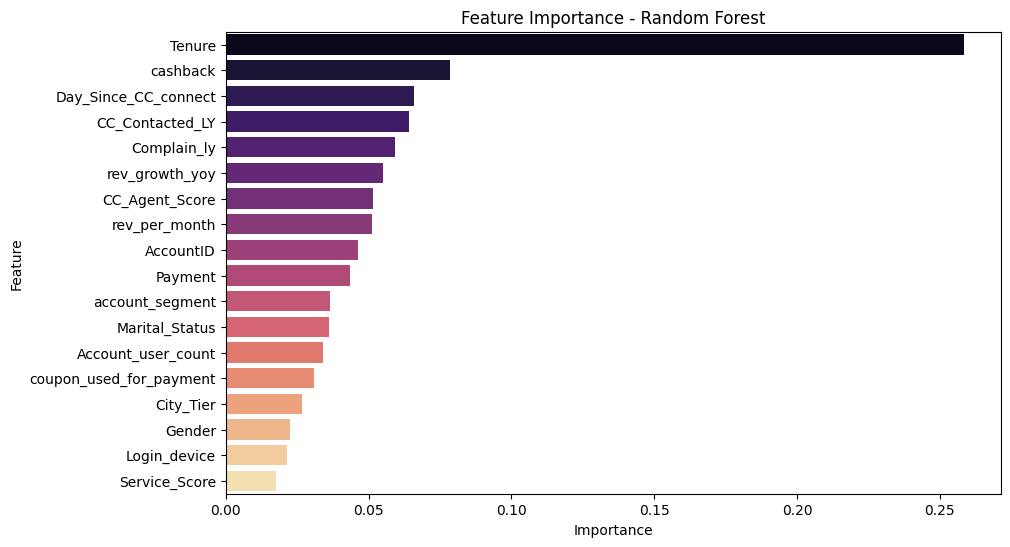

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importance
rf_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance.Importance, y=rf_importance.Feature, palette='magma')
plt.title("Feature Importance - Random Forest")
plt.show()
